# analyse data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def plot_reward(data: pd.DataFrame) -> None:
	for index, row in data[['rewards', 'SR']].iterrows():
		rew = row['rewards']
		sr = row['SR']
		plt.plot(rew, alpha=0.7)
	plt.legend()
	plt.ylabel('normalized cumulative reward')
	plt.xlabel('episodes')
	plt.title('CartPole')
	plt.suptitle('Comparison of learning converge speeds with success rate > 90%')
	plt.show()

# Cartpole

In [7]:
data = pd.read_csv('log/CartPole_v1_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data = data.where(data['SR']>0.90).dropna()
data

,env,llm,reward_function,rewards,mean_reward,std_reward,SR
7,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, term...","[0.00430713914556539, 0.0049367975543517335, 0...",0.024322,0.039425,1.00
16,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.006517211874490863, 0.01102912778759992, 0....",0.028519,0.036442,1.00
17,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.006517211874490863, 0.01102912778759992, 0....",0.028519,0.036442,1.00
18,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.0044957303528576666, 0.010470972299065165, ...",0.026326,0.036318,1.00
19,CartPole-v1,qwen2.5-coder,"def reward_func(observations: np.ndarray, is_s...","[0.0044957303528576666, 0.010470972299065165, ...",0.026326,0.036318,1.00
26,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[0.014283901153800392, 0.024185390763619086, 0...",0.027620,0.031636,1.00
27,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[-0.046730880775070406, -0.06876168102932487, ...",-0.038073,0.012162,1.06
28,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[-0.046730880775070406, -0.06876168102932487, ...",-0.038073,0.012162,1.06
30,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[0.003647727787825481, 0.008510238890186208, 0...",0.024306,0.038189,1.00
31,CartPole-v1,qwen2.5-coder,"def reward_func(observations:np.ndarray, is_su...","[-0.00023294253991161537, 0.000339252567502347...",0.022343,0.036137,0.97


/tmp/ipykernel_68523/1594537479.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


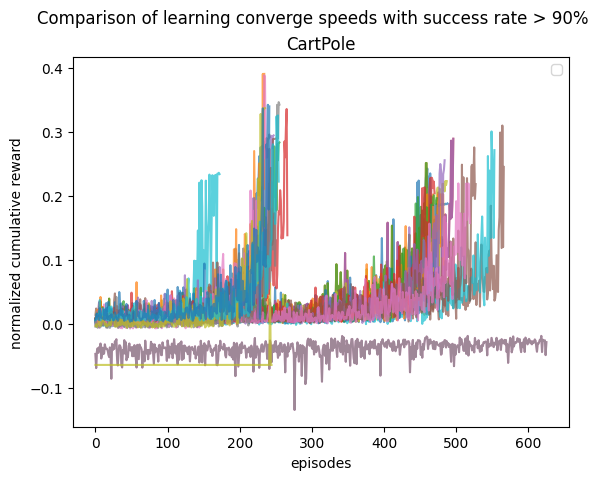

In [13]:
plot_reward(data)

In [5]:
data.loc[47]

env                                                      CartPole-v1
llm                                                    qwen2.5-coder
reward_function    def reward_func(observations:np.ndarray, is_su...
rewards            [0.00496324016524664, -0.0036319687486247184, ...
mean_reward                                                 0.037176
std_reward                                                   0.06632
SR                                                              0.92
Name: 47, dtype: object

In [6]:
print(data.loc[47].reward_function)

def reward_func(observations:np.ndarray, is_success:bool, is_failure:bool) -> float:    
    x, x_dot, theta, theta_dot = observations
    
    if is_success:
        return 10.0
    elif is_failure:
        return -10.0
    else:
        # Reward based on how close to vertical the pole is and how stable it is
        proximity_to_vertical = np.cos(theta)
        stability_factor = np.exp(-abs(theta_dot))
        
        reward = proximity_to_vertical * stability_factor
        
        return reward


# Lunar Lander

In [ ]:
data = pd.read_csv('log/LunarLander_v3_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data = data.where(data['SR']>0.2).dropna()
data

In [ ]:
plot_reward(data)

In [ ]:
data.loc[37]

In [ ]:
print(data.loc[37].reward_function)

# Hopper

In [ ]:
data = pd.read_csv('log/Hopper_v5_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data

In [ ]:
print(data.iloc[1].reward_function)

In [ ]:
for idx, rew in enumerate(data.iloc['rewards']):
	plt.plot(rew, label=idx, alpha=0.7)
	plt.legend()	